In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import distributions

from sklearn import datasets

In [2]:
import nflib as tnf

%load_ext autoreload
%autoreload 2

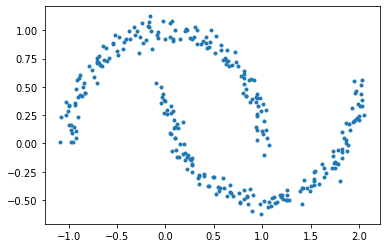

In [3]:
%matplotlib inline
X, _ =datasets.make_moons(n_samples=300, noise=0.05)
xx = torch.Tensor(X)
plt.scatter(X[:,0], X[:,1], marker='.')

In [4]:
dist = distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))

In [5]:
# dist = distributions.TransformedDistribution(
#     distributions.Uniform(torch.zeros(2), torch.ones(2)),
#     distributions.SigmoidTransform().inv)

In [6]:
# layers = [
#     tnf.LinearFlow(2),
#     tnf.PReluFLow(2),
# #     tnf.ActNorm1d(2),
#     tnf.LinearFlow(2),
#     tnf.PReluFLow(2),
# #     tnf.ActNorm1d(2),
#     tnf.LinearFlow(2),
#     tnf.PReluFLow(2),
# #     tnf.ActNorm1d(2),
#     tnf.LinearFlow(2),
# ]
# nfnet = tnf.SequentialFlow(layers)

In [7]:
# nfnet = tnf.ResidualMLP(2, [20,20,20])

In [8]:
mlpg = tnf.coupling_flows.MLP_Generator([25,25,25])
# dimx = tnf.coupling_flows.DimensionMixer(2)

layers = []
for i in range(8):
    _a = tnf.CouplingFlow(2, func_generator=mlpg, dim_sample=i%2)
    _b = tnf.ActNorm1d(2)
    layers += [_a,]
layers.append(tnf.LinearFlow(2))
    
nfnet = tnf.SequentialFlow(layers)

In [9]:
optimizer = torch.optim.Adam(nfnet.parameters(), lr=0.0001, weight_decay=1e-5)

In [10]:
# i = 1
# layers[i](xx, True)

In [11]:
len(list(nfnet.parameters()))

130

In [12]:
# x0_, x1_ = torch.meshgrid(
#     torch.linspace(X[:,0].min(), X[:,0].max(), 20),
#     torch.linspace(X[:,1].min(), X[:,1].max(), 20),
# )
# x_ = torch.stack([x0_.reshape(-1), x1_.reshape(-1)], dim=1)
# x_.shape

In [13]:
STEPS = 1000

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)
for step in range(STEPS):
    X, _ =datasets.make_moons(n_samples=300, noise=0.05)
    xx = torch.Tensor(X)
    xx_ = xx[np.random.randint(0, len(xx), 150)]
    yy, logdetJ = nfnet(xx_, True)
    logprob = dist.log_prob(yy).view(yy.shape[0], -1).sum(dim=1)   
    NLL = -(logprob + logdetJ).sum()    
    
    optimizer.zero_grad()
    NLL.backward()
    optimizer.step()
    
    if step%10 == 0:
        print(f"Step: {step}; NLL: {float(NLL)}")
        
        ax.clear()
        ax.scatter(xx_[:,0], xx_[:,1], marker='o', c=logprob.data)
        ax.scatter(yy.data[:,0], yy.data[:,1], marker='o', color='b')
        with torch.no_grad():
            z = dist.sample((150*8,))
            x_ = nfnet.inverse(z, False)
#             p_ = torch.exp(dist.log_prob(y_).sum(dim=1))
            ax.scatter(x_[:,0], x_[:,1], marker='.', c='r')

        fig.canvas.draw()
        plt.pause(0.01)

Step: 0; NLL: 501.46533203125
Step: 10; NLL: 450.5113525390625
Step: 20; NLL: 443.13446044921875
Step: 30; NLL: 404.5933837890625
Step: 40; NLL: 387.13787841796875
Step: 50; NLL: 391.0438537597656
Step: 60; NLL: 370.3091125488281
Step: 70; NLL: 357.06005859375
Step: 80; NLL: 340.435791015625
Step: 90; NLL: 336.5542297363281
Step: 100; NLL: 318.5002136230469
Step: 110; NLL: 301.5050964355469
Step: 120; NLL: 285.02471923828125
Step: 130; NLL: 303.37664794921875
Step: 140; NLL: 297.388427734375
Step: 150; NLL: 277.9504089355469
Step: 160; NLL: 274.03857421875
Step: 170; NLL: 273.90643310546875
Step: 180; NLL: 274.25030517578125
Step: 190; NLL: 264.284912109375
Step: 200; NLL: 274.19976806640625
Step: 210; NLL: 258.35919189453125
Step: 220; NLL: 267.0691223144531
Step: 230; NLL: 265.2342529296875
Step: 240; NLL: 263.2582092285156
Step: 250; NLL: 273.3049011230469
Step: 260; NLL: 268.44696044921875
Step: 270; NLL: 258.65362548828125
Step: 280; NLL: 263.2728271484375
Step: 290; NLL: 256.7933

TclError: invalid command name "pyimage14"

In [ ]:
# STEPS = 1000

# %matplotlib tk
# fig = plt.figure()
# ax = fig.add_subplot(111)
# for step in range(STEPS):
#     xx_ = xx[np.random.randint(0, len(xx), 150)]
#     yy, logdetJ = nfnet(xx_, True)
#     logprob = dist.log_prob(yy).sum(dim=1)   
#     NLL = -(logprob + logdetJ).sum()    
    
#     optimizer.zero_grad()
#     NLL.backward()
#     optimizer.step()
    
#     if step%10 == 0:
#         print(f"Step: {step}; NLL: {float(NLL)}")
        
#         ax.clear()
#         ax.scatter(xx_[:,0], xx_[:,1], marker='o', c=logprob.data)
        
#         with torch.no_grad():
#             y_ = nfnet(x_, False)
#             p_ = torch.exp(dist.log_prob(y_).sum(dim=1))
#             ax.scatter(x_[:,0], x_[:,1], marker='.', c=p_)

#         fig.canvas.draw()
#         plt.pause(0.01)

In [ ]:
asdfsdf aesdfsda 

In [ ]:
torch.eye(2).expand(5,2,2)

In [ ]:
linear = nn.Linear(3,3)
nn.utils.spectral_norm(linear)

In [ ]:
linear(torch.randn(1,3))

In [ ]:
linear.weight

In [ ]:
linear.weight_orig

In [ ]:
linear.weight

In [ ]:
linear.weight_orig

In [ ]:
W = torch.randn(2,3)

In [ ]:
# x_ = torch.randn(3,2,2)
x_ = torch.eye(2).expand(3,2,2)

In [ ]:
x_, W

In [ ]:
z_ = x_@W
z_.shape

In [ ]:
mask = (torch.randn(3,3)>0).type(W.dtype)

In [ ]:
mask

In [ ]:
z_

In [ ]:
y_ = z_*mask.unsqueeze(dim=2)
y_.shape

In [ ]:
y_ = z_*mask.unsqueeze(dim=1)
# mask.unsqueeze(dim=1).shape
y_.shape

In [ ]:
y_[0]

In [ ]:
mask

In [ ]:
W

In [ ]:
a = torch.randn(4)
torch.argsort(a)

In [ ]:
a = torch.randn(3,5)
a[:,torch.argsort(a[0])[:2]]